# CNOT

This notebook shows the construction and simulation results of the logical CNOT gate between two logical qubits with lattice surgery.

## Construction

A logical CNOT between two logical qubits can be implemented with the help of an ancilla qubit. It can be accomplished by the following steps:

1. $M_{ZZ}$ parity measurement between $Q_{control}$ and $Q_{ancilla}$.
2. $M_{XX}$ parity measurement between $Q_{target}$ and $Q_{ancilla}$.
3. $M_{Z}$ measurement of $Q_{ancilla}$.

`tqec` provides builtin functions `tqec.gallery.cnot` to construct the logical CNOT gate.

In [1]:
from tqec.gallery import cnot

graph = cnot()
graph.view_as_html()

The logical CNOT has four independent stabilizer flow generators: ``XX -> XI`, XI -> XX`, `ZI -> ZI`, `ZZ -> IZ`. Here we show the correlation surfaces for the generators.

In [2]:
correlation_surfaces = graph.find_correlation_surfaces()
stab_to_surface = {s.external_stabilizer_on_graph(graph): s for s in correlation_surfaces}
print(stab_to_surface.keys())

dict_keys(['XXXI', 'XIXX', 'ZIZI', 'ZZIZ'])


#### `XX -> XI`

In [3]:
graph.view_as_html(
    pop_faces_at_directions=("-Y",),
    show_correlation_surface=stab_to_surface["XXXI"],
)

#### `XI -> XX`

In [4]:
graph.view_as_html(
    pop_faces_at_directions=("-Y",),
    show_correlation_surface=stab_to_surface["XIXX"],
)

#### `ZI -> ZI`

In [5]:
graph.view_as_html(
    pop_faces_at_directions=("-Y",),
    show_correlation_surface=stab_to_surface["ZIZI"],
)

#### `ZZ -> IZ`

In [6]:
graph.view_as_html(
    pop_faces_at_directions=("-Y",),
    show_correlation_surface=stab_to_surface["ZZIZ"],
)

## Example Circuit

Here we show an example circuit of logical CNOT with $d=3$ surface code that is initialized and measured in X basis [<cite data-footcite-t="Horsman_2012"></cite>]. You can download the circuit [here](../media/gallery/cnot/circuit.stim) or view it in [Crumble](https://algassert.com/crumble#circuit=Q(0,4)0;Q(0,8)1;Q(0,12)2;Q(1,1)3;Q(1,3)4;Q(1,5)5;Q(1,7)6;Q(1,9)7;Q(1,11)8;Q(1,13)9;Q(2,0)10;Q(2,2)11;Q(2,4)12;Q(2,6)13;Q(2,8)14;Q(2,10)15;Q(2,12)16;Q(3,1)17;Q(3,3)18;Q(3,5)19;Q(3,7)20;Q(3,9)21;Q(3,11)22;Q(3,13)23;Q(4,2)24;Q(4,4)25;Q(4,6)26;Q(4,8)27;Q(4,10)28;Q(4,12)29;Q(4,14)30;Q(5,1)31;Q(5,3)32;Q(5,5)33;Q(5,7)34;Q(5,9)35;Q(5,11)36;Q(5,13)37;Q(6,2)38;Q(6,6)39;Q(6,8)40;Q(6,10)41;Q(6,12)42;Q(7,9)43;Q(7,11)44;Q(7,13)45;Q(8,10)46;Q(8,12)47;Q(8,14)48;Q(9,9)49;Q(9,11)50;Q(9,13)51;Q(10,8)52;Q(10,10)53;Q(10,12)54;Q(11,9)55;Q(11,11)56;Q(11,13)57;Q(12,10)58;Q(12,12)59;Q(12,14)60;Q(13,9)61;Q(13,11)62;Q(13,13)63;Q(14,10)64;RX_0_3_4_5_10_11_12_17_18_19_24_25_26_31_32_33_38_47_49_50_51_52_53_54_55_56_57_58_59_60_61_62_63_64;POLYGON(0,0,1,0.25)3_17_18_4;POLYGON(0,0,1,0.25)31_32;POLYGON(0,0,1,0.25)4_5;POLYGON(0,0,1,0.25)18_32_33_19;POLYGON(0,0,1,0.25)49_55_56_50;POLYGON(0,0,1,0.25)61_62;POLYGON(0,0,1,0.25)50_51;POLYGON(0,0,1,0.25)56_62_63_57;POLYGON(1,0,0,0.25)17_3;POLYGON(1,0,0,0.25)17_31_32_18;POLYGON(1,0,0,0.25)4_18_19_5;POLYGON(1,0,0,0.25)33_19;POLYGON(1,0,0,0.25)55_49;POLYGON(1,0,0,0.25)55_61_62_56;POLYGON(1,0,0,0.25)50_56_57_51;POLYGON(1,0,0,0.25)63_57;TICK;CX_12_4_24_17_26_19_54_50_58_55_60_57;CZ_11_3_25_18_38_31_53_49_59_56_64_61;TICK;CX_12_18_24_31_26_33_54_56_58_61_60_63;CZ_0_4_47_50;TICK;CX_10_3_12_5_24_18_52_49_54_51_58_56;CZ_11_4_25_19_38_32_53_50_59_57_64_62;TICK;CZ_11_17_25_32_53_55_59_62;TICK;CX_10_17_12_19_24_32_52_55_54_57_58_62;CZ_0_5_11_18_25_33_47_51_53_56_59_63;TICK;MX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;DT(2,0,0)rec[-15];DT(2,4,0)rec[-13];DT(4,2,0)rec[-12];DT(4,6,0)rec[-10];DT(10,8,0)rec[-7];DT(10,12,0)rec[-5];DT(12,10,0)rec[-4];DT(12,14,0)rec[-2];TICK;RX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;TICK;CX_12_4_24_17_26_19_54_50_58_55_60_57;CZ_11_3_25_18_38_31_53_49_59_56_64_61;TICK;CX_12_18_24_31_26_33_54_56_58_61_60_63;CZ_0_4_47_50;TICK;CX_10_3_12_5_24_18_52_49_54_51_58_56;CZ_11_4_25_19_38_32_53_50_59_57_64_62;TICK;CZ_11_17_25_32_53_55_59_62;TICK;CX_10_17_12_19_24_32_52_55_54_57_58_62;CZ_0_5_11_18_25_33_47_51_53_56_59_63;TICK;MX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;DT(0,4,1)rec[-16]_rec[-32];DT(2,0,1)rec[-15]_rec[-31];DT(2,2,1)rec[-14]_rec[-30];DT(2,4,1)rec[-13]_rec[-29];DT(4,2,1)rec[-12]_rec[-28];DT(4,4,1)rec[-11]_rec[-27];DT(4,6,1)rec[-10]_rec[-26];DT(6,2,1)rec[-9]_rec[-25];DT(8,12,1)rec[-8]_rec[-24];DT(10,8,1)rec[-7]_rec[-23];DT(10,10,1)rec[-6]_rec[-22];DT(10,12,1)rec[-5]_rec[-21];DT(12,10,1)rec[-4]_rec[-20];DT(12,12,1)rec[-3]_rec[-19];DT(12,14,1)rec[-2]_rec[-18];DT(14,10,1)rec[-1]_rec[-17];TICK;RX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;TICK;CX_12_4_24_17_26_19_54_50_58_55_60_57;CZ_11_3_25_18_38_31_53_49_59_56_64_61;TICK;CX_12_18_24_31_26_33_54_56_58_61_60_63;CZ_0_4_47_50;TICK;CX_10_3_12_5_24_18_52_49_54_51_58_56;CZ_11_4_25_19_38_32_53_50_59_57_64_62;TICK;CZ_11_17_25_32_53_55_59_62;TICK;CX_10_17_12_19_24_32_52_55_54_57_58_62;CZ_0_5_11_18_25_33_47_51_53_56_59_63;TICK;MX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;DT(0,4,2)rec[-16]_rec[-32];DT(2,0,2)rec[-15]_rec[-31];DT(2,2,2)rec[-14]_rec[-30];DT(2,4,2)rec[-13]_rec[-29];DT(4,2,2)rec[-12]_rec[-28];DT(4,4,2)rec[-11]_rec[-27];DT(4,6,2)rec[-10]_rec[-26];DT(6,2,2)rec[-9]_rec[-25];DT(8,12,2)rec[-8]_rec[-24];DT(10,8,2)rec[-7]_rec[-23];DT(10,10,2)rec[-6]_rec[-22];DT(10,12,2)rec[-5]_rec[-21];DT(12,10,2)rec[-4]_rec[-20];DT(12,12,2)rec[-3]_rec[-19];DT(12,14,2)rec[-2]_rec[-18];DT(14,10,2)rec[-1]_rec[-17];TICK;RX_0_1_2_6_7_8_9_10_11_12_13_14_15_16_20_21_22_23_24_25_26_27_28_29_30_34_35_36_37_38_39_41_47_52_53_54_58_59_60_64;POLYGON(0,0,1,0.25)3_17_18_4;POLYGON(0,0,1,0.25)31_32;POLYGON(0,0,1,0.25)4_5;POLYGON(0,0,1,0.25)18_32_33_19;POLYGON(0,0,1,0.25)5_19_20_6;POLYGON(0,0,1,0.25)33_34;POLYGON(0,0,1,0.25)6_7;POLYGON(0,0,1,0.25)20_34_35_21;POLYGON(0,0,1,0.25)7_21_22_8;POLYGON(0,0,1,0.25)35_36;POLYGON(0,0,1,0.25)49_55_56_50;POLYGON(0,0,1,0.25)61_62;POLYGON(0,0,1,0.25)8_9;POLYGON(0,0,1,0.25)22_36_37_23;POLYGON(0,0,1,0.25)50_51;POLYGON(0,0,1,0.25)56_62_63_57;POLYGON(1,0,0,0.25)17_3;POLYGON(1,0,0,0.25)17_31_32_18;POLYGON(1,0,0,0.25)4_18_19_5;POLYGON(1,0,0,0.25)19_33_34_20;POLYGON(1,0,0,0.25)6_20_21_7;POLYGON(1,0,0,0.25)55_49;POLYGON(1,0,0,0.25)21_35_36_22;POLYGON(1,0,0,0.25)55_61_62_56;POLYGON(1,0,0,0.25)8_22_23_9;POLYGON(1,0,0,0.25)50_56_57_51;POLYGON(1,0,0,0.25)37_23;POLYGON(1,0,0,0.25)63_57;TICK;CX_12_4_14_6_16_8_24_17_26_19_28_21_30_23_54_50_58_55_60_57;CZ_11_3_13_5_15_7_25_18_27_20_29_22_38_31_39_33_41_35_53_49_59_56_64_61;TICK;CX_12_18_14_20_16_22_24_31_26_33_28_35_30_37_54_56_58_61_60_63;CZ_0_4_1_6_2_8_47_50;TICK;CX_10_3_12_5_14_7_16_9_24_18_26_20_28_22_52_49_54_51_58_56;CZ_11_4_13_6_15_8_25_19_27_21_29_23_38_32_39_34_41_36_53_50_59_57_64_62;TICK;CZ_11_17_13_19_15_21_25_32_27_34_29_36_53_55_59_62;TICK;CX_10_17_12_19_14_21_16_23_24_32_26_34_28_36_52_55_54_57_58_62;CZ_0_5_1_7_2_9_11_18_13_20_15_22_25_33_27_35_29_37_47_51_53_56_59_63;TICK;MX_0_1_2_10_11_12_13_14_15_16_24_25_26_27_28_29_30_38_39_41_47_52_53_54_58_59_60_64;DT(0,4,3)rec[-28]_rec[-44];DT(2,0,3)rec[-25]_rec[-43];DT(2,2,3)rec[-24]_rec[-42];DT(2,4,3)rec[-23]_rec[-41];DT(2,8,3)rec[-21];DT(2,12,3)rec[-19];DT(4,2,3)rec[-18]_rec[-40];DT(4,4,3)rec[-17]_rec[-39];DT(4,6,3)rec[-16]_rec[-38];DT(4,10,3)rec[-14];DT(4,14,3)rec[-12];DT(6,2,3)rec[-11]_rec[-37];DT(8,12,3)rec[-8]_rec[-36];DT(10,8,3)rec[-7]_rec[-35];DT(10,10,3)rec[-6]_rec[-34];DT(10,12,3)rec[-5]_rec[-33];DT(12,10,3)rec[-4]_rec[-32];DT(12,12,3)rec[-3]_rec[-31];DT(12,14,3)rec[-2]_rec[-30];DT(14,10,3)rec[-1]_rec[-29];TICK;RX_0_1_2_10_11_12_13_14_15_16_24_25_26_27_28_29_30_38_39_41_47_52_53_54_58_59_60_64;TICK;CX_12_4_14_6_16_8_24_17_26_19_28_21_30_23_54_50_58_55_60_57;CZ_11_3_13_5_15_7_25_18_27_20_29_22_38_31_39_33_41_35_53_49_59_56_64_61;TICK;CX_12_18_14_20_16_22_24_31_26_33_28_35_30_37_54_56_58_61_60_63;CZ_0_4_1_6_2_8_47_50;TICK;CX_10_3_12_5_14_7_16_9_24_18_26_20_28_22_52_49_54_51_58_56;CZ_11_4_13_6_15_8_25_19_27_21_29_23_38_32_39_34_41_36_53_50_59_57_64_62;TICK;CZ_11_17_13_19_15_21_25_32_27_34_29_36_53_55_59_62;TICK;CX_10_17_12_19_14_21_16_23_24_32_26_34_28_36_52_55_54_57_58_62;CZ_0_5_1_7_2_9_11_18_13_20_15_22_25_33_27_35_29_37_47_51_53_56_59_63;TICK;MX_0_1_2_10_11_12_13_14_15_16_24_25_26_27_28_29_30_38_39_41_47_52_53_54_58_59_60_64;DT(0,4,4)rec[-28]_rec[-56];DT(0,8,4)rec[-27]_rec[-55];DT(0,12,4)rec[-26]_rec[-54];DT(2,0,4)rec[-25]_rec[-53];DT(2,2,4)rec[-24]_rec[-52];DT(2,4,4)rec[-23]_rec[-51];DT(2,6,4)rec[-22]_rec[-50];DT(2,8,4)rec[-21]_rec[-49];DT(2,10,4)rec[-20]_rec[-48];DT(2,12,4)rec[-19]_rec[-47];DT(4,2,4)rec[-18]_rec[-46];DT(4,4,4)rec[-17]_rec[-45];DT(4,6,4)rec[-16]_rec[-44];DT(4,8,4)rec[-15]_rec[-43];DT(4,10,4)rec[-14]_rec[-42];DT(4,12,4)rec[-13]_rec[-41];DT(4,14,4)rec[-12]_rec[-40];DT(6,2,4)rec[-11]_rec[-39];DT(6,6,4)rec[-10]_rec[-38];DT(6,10,4)rec[-9]_rec[-37];DT(8,12,4)rec[-8]_rec[-36];DT(10,8,4)rec[-7]_rec[-35];DT(10,10,4)rec[-6]_rec[-34];DT(10,12,4)rec[-5]_rec[-33];DT(12,10,4)rec[-4]_rec[-32];DT(12,12,4)rec[-3]_rec[-31];DT(12,14,4)rec[-2]_rec[-30];DT(14,10,4)rec[-1]_rec[-29];TICK;RX_0_1_2_10_11_12_13_14_15_16_24_25_26_27_28_29_30_38_39_41_47_52_53_54_58_59_60_64;TICK;CX_12_4_14_6_16_8_24_17_26_19_28_21_30_23_54_50_58_55_60_57;CZ_11_3_13_5_15_7_25_18_27_20_29_22_38_31_39_33_41_35_53_49_59_56_64_61;TICK;CX_12_18_14_20_16_22_24_31_26_33_28_35_30_37_54_56_58_61_60_63;CZ_0_4_1_6_2_8_47_50;TICK;CX_10_3_12_5_14_7_16_9_24_18_26_20_28_22_52_49_54_51_58_56;CZ_11_4_13_6_15_8_25_19_27_21_29_23_38_32_39_34_41_36_53_50_59_57_64_62;TICK;CZ_11_17_13_19_15_21_25_32_27_34_29_36_53_55_59_62;TICK;CX_10_17_12_19_14_21_16_23_24_32_26_34_28_36_52_55_54_57_58_62;CZ_0_5_1_7_2_9_11_18_13_20_15_22_25_33_27_35_29_37_47_51_53_56_59_63;TICK;MX_0_1_2_6_10_11_12_13_14_15_16_20_24_25_26_27_28_29_30_34_38_39_41_47_52_53_54_58_59_60_64;DT(0,4,5)rec[-31]_rec[-59];DT(0,8,5)rec[-30]_rec[-58];DT(0,12,5)rec[-29]_rec[-57];DT(2,0,5)rec[-27]_rec[-56];DT(2,2,5)rec[-26]_rec[-55];DT(2,4,5)rec[-25]_rec[-54];DT(2,6,5)rec[-24]_rec[-53];DT(2,8,5)rec[-23]_rec[-52];DT(2,10,5)rec[-22]_rec[-51];DT(2,12,5)rec[-21]_rec[-50];DT(4,2,5)rec[-19]_rec[-49];DT(4,4,5)rec[-18]_rec[-48];DT(4,6,5)rec[-17]_rec[-47];DT(4,8,5)rec[-16]_rec[-46];DT(4,10,5)rec[-15]_rec[-45];DT(4,12,5)rec[-14]_rec[-44];DT(4,14,5)rec[-13]_rec[-43];DT(6,2,5)rec[-11]_rec[-42];DT(6,6,5)rec[-10]_rec[-41];DT(6,10,5)rec[-9]_rec[-40];DT(8,12,5)rec[-8]_rec[-39];DT(10,8,5)rec[-7]_rec[-38];DT(10,10,5)rec[-6]_rec[-37];DT(10,12,5)rec[-5]_rec[-36];DT(12,10,5)rec[-4]_rec[-35];DT(12,12,5)rec[-3]_rec[-34];DT(12,14,5)rec[-2]_rec[-33];DT(14,10,5)rec[-1]_rec[-32];TICK;R_43_44_45;RX_0_2_10_11_12_14_15_16_24_25_26_28_29_30_38_40_41_42_46_47_48_52_53_54_58_59_60_64;POLYGON(0,0,1,0.25)3_17_18_4;POLYGON(0,0,1,0.25)31_32;POLYGON(0,0,1,0.25)4_5;POLYGON(0,0,1,0.25)18_32_33_19;POLYGON(0,0,1,0.25)7_21_22_8;POLYGON(0,0,1,0.25)35_43_44_36;POLYGON(0,0,1,0.25)49_55_56_50;POLYGON(0,0,1,0.25)61_62;POLYGON(0,0,1,0.25)8_9;POLYGON(0,0,1,0.25)22_36_37_23;POLYGON(0,0,1,0.25)44_50_51_45;POLYGON(0,0,1,0.25)56_62_63_57;POLYGON(1,0,0,0.25)17_3;POLYGON(1,0,0,0.25)17_31_32_18;POLYGON(1,0,0,0.25)4_18_19_5;POLYGON(1,0,0,0.25)33_19;POLYGON(1,0,0,0.25)21_7;POLYGON(1,0,0,0.25)43_35;POLYGON(1,0,0,0.25)55_49;POLYGON(1,0,0,0.25)21_35_36_22;POLYGON(1,0,0,0.25)43_49_50_44;POLYGON(1,0,0,0.25)55_61_62_56;POLYGON(1,0,0,0.25)8_22_23_9;POLYGON(1,0,0,0.25)36_44_45_37;POLYGON(1,0,0,0.25)50_56_57_51;POLYGON(1,0,0,0.25)37_23;POLYGON(1,0,0,0.25)51_45;POLYGON(1,0,0,0.25)63_57;TICK;CX_12_4_16_8_24_17_26_19_28_21_30_23_42_36_46_43_48_45_54_50_58_55_60_57;CZ_11_3_15_7_25_18_29_22_38_31_41_35_47_44_53_49_59_56_64_61;TICK;CX_12_18_16_22_24_31_26_33_28_35_30_37_42_44_46_49_48_51_54_56_58_61_60_63;CZ_0_4_2_8;TICK;CX_10_3_12_5_14_7_16_9_24_18_28_22_40_35_42_37_46_44_52_49_54_51_58_56;CZ_11_4_15_8_25_19_29_23_38_32_41_36_47_45_53_50_59_57_64_62;TICK;CZ_11_17_15_21_25_32_29_36_41_43_47_50_53_55_59_62;TICK;CX_10_17_12_19_14_21_16_23_24_32_28_36_40_43_42_45_46_50_52_55_54_57_58_62;CZ_0_5_2_9_11_18_15_22_25_33_29_37_41_44_47_51_53_56_59_63;TICK;MX_0_2_10_11_12_14_15_16_24_25_26_28_29_30_38_40_41_42_46_47_48_52_53_54_58_59_60_64;DT(0,4,6)rec[-28]_rec[-59];DT(0,12,6)rec[-27]_rec[-57];DT(2,0,6)rec[-26]_rec[-55];DT(2,2,6)rec[-25]_rec[-54];DT(2,4,6)rec[-24]_rec[-53];DT(1,7,6)rec[-23]_rec[-48]_rec[-51]_rec[-56];DT(2,10,6)rec[-22]_rec[-50];DT(2,12,6)rec[-21]_rec[-49];DT(4,2,6)rec[-20]_rec[-47];DT(4,4,6)rec[-19]_rec[-46];DT(4,6,6)rec[-18]_rec[-40]_rec[-45]_rec[-48];DT(4,10,6)rec[-17]_rec[-43];DT(4,12,6)rec[-16]_rec[-42];DT(4,14,6)rec[-15]_rec[-41];DT(6,2,6)rec[-14]_rec[-39];DT(6,10,6)rec[-12]_rec[-37];DT(8,12,6)rec[-9]_rec[-36];DT(10,8,6)rec[-7]_rec[-35];DT(10,10,6)rec[-6]_rec[-34];DT(10,12,6)rec[-5]_rec[-33];DT(12,10,6)rec[-4]_rec[-32];DT(12,12,6)rec[-3]_rec[-31];DT(12,14,6)rec[-2]_rec[-30];DT(14,10,6)rec[-1]_rec[-29];TICK;RX_0_2_10_11_12_14_15_16_24_25_26_28_29_30_38_40_41_42_46_47_48_52_53_54_58_59_60_64;TICK;CX_12_4_16_8_24_17_26_19_28_21_30_23_42_36_46_43_48_45_54_50_58_55_60_57;CZ_11_3_15_7_25_18_29_22_38_31_41_35_47_44_53_49_59_56_64_61;TICK;CX_12_18_16_22_24_31_26_33_28_35_30_37_42_44_46_49_48_51_54_56_58_61_60_63;CZ_0_4_2_8;TICK;CX_10_3_12_5_14_7_16_9_24_18_28_22_40_35_42_37_46_44_52_49_54_51_58_56;CZ_11_4_15_8_25_19_29_23_38_32_41_36_47_45_53_50_59_57_64_62;TICK;CZ_11_17_15_21_25_32_29_36_41_43_47_50_53_55_59_62;TICK;CX_10_17_12_19_14_21_16_23_24_32_28_36_40_43_42_45_46_50_52_55_54_57_58_62;CZ_0_5_2_9_11_18_15_22_25_33_29_37_41_44_47_51_53_56_59_63;TICK;MX_0_2_10_11_12_14_15_16_24_25_26_28_29_30_38_40_41_42_46_47_48_52_53_54_58_59_60_64;DT(0,4,7)rec[-28]_rec[-56];DT(0,12,7)rec[-27]_rec[-55];DT(2,0,7)rec[-26]_rec[-54];DT(2,2,7)rec[-25]_rec[-53];DT(2,4,7)rec[-24]_rec[-52];DT(2,8,7)rec[-23]_rec[-51];DT(2,10,7)rec[-22]_rec[-50];DT(2,12,7)rec[-21]_rec[-49];DT(4,2,7)rec[-20]_rec[-48];DT(4,4,7)rec[-19]_rec[-47];DT(4,6,7)rec[-18]_rec[-46];DT(4,10,7)rec[-17]_rec[-45];DT(4,12,7)rec[-16]_rec[-44];DT(4,14,7)rec[-15]_rec[-43];DT(6,2,7)rec[-14]_rec[-42];DT(6,8,7)rec[-13]_rec[-41];DT(6,10,7)rec[-12]_rec[-40];DT(6,12,7)rec[-11]_rec[-39];DT(8,10,7)rec[-10]_rec[-38];DT(8,12,7)rec[-9]_rec[-37];DT(8,14,7)rec[-8]_rec[-36];DT(10,8,7)rec[-7]_rec[-35];DT(10,10,7)rec[-6]_rec[-34];DT(10,12,7)rec[-5]_rec[-33];DT(12,10,7)rec[-4]_rec[-32];DT(12,12,7)rec[-3]_rec[-31];DT(12,14,7)rec[-2]_rec[-30];DT(14,10,7)rec[-1]_rec[-29];TICK;RX_0_2_10_11_12_14_15_16_24_25_26_28_29_30_38_40_41_42_46_47_48_52_53_54_58_59_60_64;TICK;CX_12_4_16_8_24_17_26_19_28_21_30_23_42_36_46_43_48_45_54_50_58_55_60_57;CZ_11_3_15_7_25_18_29_22_38_31_41_35_47_44_53_49_59_56_64_61;TICK;CX_12_18_16_22_24_31_26_33_28_35_30_37_42_44_46_49_48_51_54_56_58_61_60_63;CZ_0_4_2_8;TICK;CX_10_3_12_5_14_7_16_9_24_18_28_22_40_35_42_37_46_44_52_49_54_51_58_56;CZ_11_4_15_8_25_19_29_23_38_32_41_36_47_45_53_50_59_57_64_62;TICK;CZ_11_17_15_21_25_32_29_36_41_43_47_50_53_55_59_62;TICK;CX_10_17_12_19_14_21_16_23_24_32_28_36_40_43_42_45_46_50_52_55_54_57_58_62;CZ_0_5_2_9_11_18_15_22_25_33_29_37_41_44_47_51_53_56_59_63;TICK;M_7_8_9_21_22_23_35_36_37_43_44_45;MX_0_2_10_11_12_14_15_16_24_25_26_28_29_30_38_40_41_42_46_47_48_52_53_54_58_59_60_64;DT(0,4,8)rec[-28]_rec[-68];DT(1,11,8)rec[-27]_rec[-38]_rec[-39];DT(0,12,8)rec[-27]_rec[-67];DT(2,0,8)rec[-26]_rec[-66];DT(2,2,8)rec[-25]_rec[-65];DT(2,4,8)rec[-24]_rec[-64];DT(2,8,8)rec[-23]_rec[-63];DT(3,11,8)rec[-22]_rec[-36]_rec[-37]_rec[-39]_rec[-40];DT(2,10,8)rec[-22]_rec[-62];DT(2,12,8)rec[-21]_rec[-61];DT(4,2,8)rec[-20]_rec[-60];DT(4,4,8)rec[-19]_rec[-59];DT(4,6,8)rec[-18]_rec[-58];DT(4,10,8)rec[-17]_rec[-57];DT(4,12,8)rec[-16]_rec[-32]_rec[-33]_rec[-35]_rec[-36];DT(4,12,9)rec[-16]_rec[-56];DT(4,14,8)rec[-15]_rec[-55];DT(6,2,8)rec[-14]_rec[-54];DT(6,8,8)rec[-13]_rec[-53];DT(5,11,8)rec[-12]_rec[-30]_rec[-31]_rec[-33]_rec[-34];DT(6,10,8)rec[-12]_rec[-52];DT(6,12,8)rec[-11]_rec[-51];DT(8,10,8)rec[-10]_rec[-50];DT(8,12,8)rec[-9]_rec[-49];DT(8,14,8)rec[-8]_rec[-48];DT(10,8,8)rec[-7]_rec[-47];DT(10,10,8)rec[-6]_rec[-46];DT(10,12,8)rec[-5]_rec[-45];DT(12,10,8)rec[-4]_rec[-44];DT(12,12,8)rec[-3]_rec[-43];DT(12,14,8)rec[-2]_rec[-42];DT(14,10,8)rec[-1]_rec[-41];TICK;RX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;POLYGON(0,0,1,0.25)3_17_18_4;POLYGON(0,0,1,0.25)31_32;POLYGON(0,0,1,0.25)4_5;POLYGON(0,0,1,0.25)18_32_33_19;POLYGON(0,0,1,0.25)49_55_56_50;POLYGON(0,0,1,0.25)61_62;POLYGON(0,0,1,0.25)50_51;POLYGON(0,0,1,0.25)56_62_63_57;POLYGON(1,0,0,0.25)17_3;POLYGON(1,0,0,0.25)17_31_32_18;POLYGON(1,0,0,0.25)4_18_19_5;POLYGON(1,0,0,0.25)33_19;POLYGON(1,0,0,0.25)55_49;POLYGON(1,0,0,0.25)55_61_62_56;POLYGON(1,0,0,0.25)50_56_57_51;POLYGON(1,0,0,0.25)63_57;TICK;CX_12_4_24_17_26_19_54_50_58_55_60_57;CZ_11_3_25_18_38_31_53_49_59_56_64_61;TICK;CX_12_18_24_31_26_33_54_56_58_61_60_63;CZ_0_4_47_50;TICK;CX_10_3_12_5_24_18_52_49_54_51_58_56;CZ_11_4_25_19_38_32_53_50_59_57_64_62;TICK;CZ_11_17_25_32_53_55_59_62;TICK;CX_10_17_12_19_24_32_52_55_54_57_58_62;CZ_0_5_11_18_25_33_47_51_53_56_59_63;TICK;MX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;DT(0,4,10)rec[-16]_rec[-44];DT(2,0,10)rec[-15]_rec[-42];DT(2,2,10)rec[-14]_rec[-41];DT(2,4,10)rec[-13]_rec[-40];DT(4,2,10)rec[-12]_rec[-36];DT(4,4,10)rec[-11]_rec[-35];DT(4,6,10)rec[-10]_rec[-34];DT(6,2,10)rec[-9]_rec[-30];DT(7,13,10)rec[-8]_rec[-25]_rec[-45]_rec[-46];DT(10,8,10)rec[-7]_rec[-23];DT(10,10,10)rec[-6]_rec[-22];DT(10,12,10)rec[-5]_rec[-21];DT(12,10,10)rec[-4]_rec[-20];DT(12,12,10)rec[-3]_rec[-19];DT(12,14,10)rec[-2]_rec[-18];DT(14,10,10)rec[-1]_rec[-17];TICK;RX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;TICK;CX_12_4_24_17_26_19_54_50_58_55_60_57;CZ_11_3_25_18_38_31_53_49_59_56_64_61;TICK;CX_12_18_24_31_26_33_54_56_58_61_60_63;CZ_0_4_47_50;TICK;CX_10_3_12_5_24_18_52_49_54_51_58_56;CZ_11_4_25_19_38_32_53_50_59_57_64_62;TICK;CZ_11_17_25_32_53_55_59_62;TICK;CX_10_17_12_19_24_32_52_55_54_57_58_62;CZ_0_5_11_18_25_33_47_51_53_56_59_63;TICK;MX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;DT(0,4,11)rec[-16]_rec[-32];DT(2,0,11)rec[-15]_rec[-31];DT(2,2,11)rec[-14]_rec[-30];DT(2,4,11)rec[-13]_rec[-29];DT(4,2,11)rec[-12]_rec[-28];DT(4,4,11)rec[-11]_rec[-27];DT(4,6,11)rec[-10]_rec[-26];DT(6,2,11)rec[-9]_rec[-25];DT(8,12,11)rec[-8]_rec[-24];DT(10,8,11)rec[-7]_rec[-23];DT(10,10,11)rec[-6]_rec[-22];DT(10,12,11)rec[-5]_rec[-21];DT(12,10,11)rec[-4]_rec[-20];DT(12,12,11)rec[-3]_rec[-19];DT(12,14,11)rec[-2]_rec[-18];DT(14,10,11)rec[-1]_rec[-17];TICK;RX_0_10_11_12_24_25_26_38_47_52_53_54_58_59_60_64;TICK;CX_12_4_24_17_26_19_54_50_58_55_60_57;CZ_11_3_25_18_38_31_53_49_59_56_64_61;TICK;CX_12_18_24_31_26_33_54_56_58_61_60_63;CZ_0_4_47_50;TICK;CX_10_3_12_5_24_18_52_49_54_51_58_56;CZ_11_4_25_19_38_32_53_50_59_57_64_62;TICK;CZ_11_17_25_32_53_55_59_62;TICK;CX_10_17_12_19_24_32_52_55_54_57_58_62;CZ_0_5_11_18_25_33_47_51_53_56_59_63;TICK;MX_0_3_4_5_10_11_12_17_18_19_24_25_26_31_32_33_38_47_49_50_51_52_53_54_55_56_57_58_59_60_61_62_63_64;DT(0,4,12)rec[-34]_rec[-50];DT(2,0,12)rec[-30]_rec[-49];DT(2,2,12)rec[-29]_rec[-48];DT(2,4,12)rec[-28]_rec[-47];DT(3,1,12)rec[-27]_rec[-30]_rec[-33];DT(3,5,12)rec[-25]_rec[-26]_rec[-28]_rec[-31]_rec[-32];DT(4,2,12)rec[-24]_rec[-46];DT(4,4,12)rec[-23]_rec[-45];DT(4,6,12)rec[-22]_rec[-44];DT(5,3,12)rec[-20]_rec[-21]_rec[-24]_rec[-26]_rec[-27];DT(5,5,12)rec[-19]_rec[-22]_rec[-25];DT(6,2,12)rec[-18]_rec[-43];DT(8,12,12)rec[-17]_rec[-42];DT(10,8,12)rec[-13]_rec[-41];DT(10,10,12)rec[-12]_rec[-40];DT(10,12,12)rec[-11]_rec[-39];DT(9,9,12)rec[-10]_rec[-13]_rec[-16];DT(11,13,12)rec[-8]_rec[-9]_rec[-11]_rec[-14]_rec[-15];DT(12,10,12)rec[-7]_rec[-38];DT(12,12,12)rec[-6]_rec[-37];DT(12,14,12)rec[-5]_rec[-36];DT(13,9,12)rec[-3]_rec[-4]_rec[-7]_rec[-9]_rec[-10];DT(13,13,12)rec[-2]_rec[-5]_rec[-8];DT(14,10,12)rec[-1]_rec[-35];OI(0)rec[-8]_rec[-9]_rec[-10]_rec[-25]_rec[-26]_rec[-27]_rec[-139]_rec[-141]_rec[-142]_rec[-144]_rec[-145]_rec[-147]_rec[-149]_rec[-151]_rec[-182];OI(1)rec[-8]_rec[-9]_rec[-10]).

In [7]:
from tqec import Basis, NoiseModel, compile_block_graph

graph = cnot(Basis.X)
compiled_graph = compile_block_graph(graph)
circuit = compiled_graph.generate_stim_circuit(
    k=1, noise_model=NoiseModel.uniform_depolarizing(p=0.001)
)

## Simulation

Here we show the simulation results for all the four observables under uniform depolarizing noise model.

<details><summary><strong>Click to show the full code used for simulation</strong></summary>

```py
from multiprocessing import cpu_count
from pathlib import Path

import matplotlib.pyplot as plt
import numpy
import sinter

from tqec.gallery.cnot import cnot
from tqec import NoiseModel
from tqec.simulation.plotting.inset import plot_observable_as_inset
from tqec.simulation.simulation import start_simulation_using_sinter
from tqec.utils.enums import Basis

SAVE_DIR = Path("results")


def generate_graphs(support_observable_basis: Basis) -> None:
    block_graph = cnot(support_observable_basis)
    zx_graph = block_graph.to_zx_graph()

    correlation_surfaces = block_graph.find_correlation_surfaces()

    stats = start_simulation_using_sinter(
        block_graph,
        range(1, 4),
        list(numpy.logspace(-4, -1, 10)),
        NoiseModel.uniform_depolarizing,
        manhattan_radius=2,
        observables=correlation_surfaces,
        num_workers=cpu_count(),
        max_shots=1_000_000,
        max_errors=5_000,
        decoders=["pymatching"],
        print_progress=True,
        save_resume_filepath=Path(
            f"../_examples_database/cnot_stats_{support_observable_basis.value}.csv"
        ),
        database_path=Path("../_examples_database/database.pkl"),
    )

    for i, stat in enumerate(stats):
        fig, ax = plt.subplots()
        sinter.plot_error_rate(
            ax=ax,
            stats=stat,
            x_func=lambda stat: stat.json_metadata["p"],
            group_func=lambda stat: stat.json_metadata["d"],
        )
        plot_observable_as_inset(ax, zx_graph, correlation_surfaces[i])
        ax.grid(axis="both")
        ax.legend()
        ax.loglog()
        ax.set_title("Logical CNOT Error Rate")
        ax.set_xlabel("Physical Error Rate")
        ax.set_ylabel("Logical Error Rate")
        fig.savefig(
            SAVE_DIR
            / f"logical_cnot_result_{support_observable_basis}_observable_{i}.png"
        )


def main():
    SAVE_DIR.mkdir(exist_ok=True)
    generate_graphs(Basis.Z)
    generate_graphs(Basis.X)


if __name__ == "__main__":
    main()
```

</details>

In [8]:
from multiprocessing import cpu_count
from pathlib import Path

import matplotlib.pyplot as plt
import numpy
import sinter

from tqec import NoiseModel
from tqec.gallery.cnot import cnot
from tqec.simulation.plotting.inset import plot_observable_as_inset
from tqec.simulation.simulation import start_simulation_using_sinter
from tqec.utils.enums import Basis


def generate_graphs(support_observable_basis: Basis) -> None:
    """Generate the logical error-rate graphs corresponding to the provided basis."""
    block_graph = cnot(support_observable_basis)
    zx_graph = block_graph.to_zx_graph()

    correlation_surfaces = block_graph.find_correlation_surfaces()

    stats = start_simulation_using_sinter(
        block_graph,
        range(1, 4),
        list(numpy.logspace(-4, -1, 10)),
        NoiseModel.uniform_depolarizing,
        manhattan_radius=2,
        observables=correlation_surfaces,
        num_workers=cpu_count(),
        max_shots=1_000_000,
        max_errors=5_000,
        decoders=["pymatching"],
        # note that save_resume_filepath and database_path can help reduce the time taken
        # by the simulation after the database and result statistics have been saved to
        # the chosen path
        save_resume_filepath=Path(
            f"../_examples_database/cnot_stats_{support_observable_basis.value}.csv"
        ),
        database_path=Path("../_examples_database/database.pkl"),
    )

    for i, stat in enumerate(stats):
        fig, ax = plt.subplots()
        sinter.plot_error_rate(
            ax=ax,
            stats=stat,
            x_func=lambda stat: stat.json_metadata["p"],
            group_func=lambda stat: stat.json_metadata["d"],
        )
        plot_observable_as_inset(ax, zx_graph, correlation_surfaces[i])
        ax.grid(axis="both")
        ax.legend()
        ax.loglog()
        ax.set_title("Logical CNOT Error Rate")
        ax.set_xlabel("Physical Error Rate")
        ax.set_ylabel("Logical Error Rate")

## Z Basis

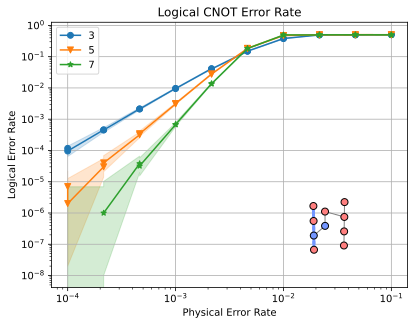

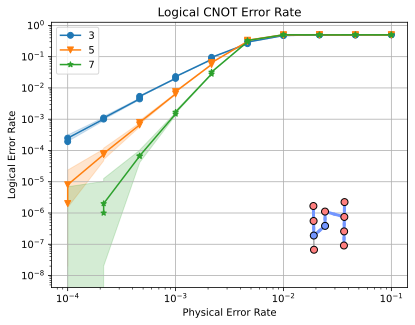

In [9]:
generate_graphs(Basis.Z)

## X Basis

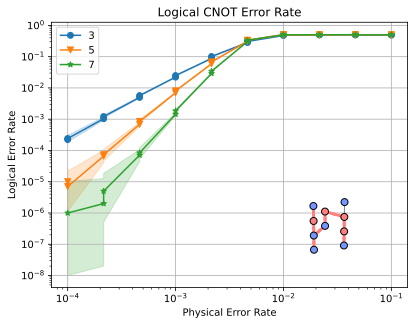

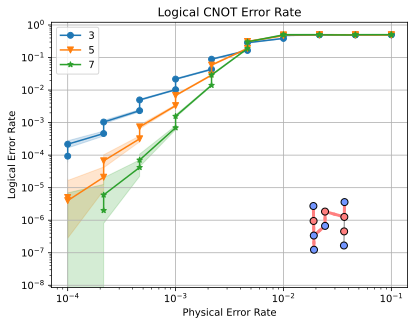

In [10]:
generate_graphs(Basis.X)

## References

.. footbibliography::